In [1]:
import tensorflow

# Linear Regression(Manual Modelling)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('Real estate.csv')

In [4]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


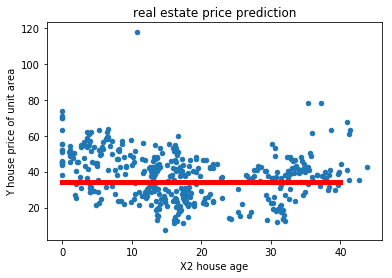

In [6]:
df.plot(kind='scatter',x='X2 house age',y='Y house price of unit area', title='real estate price prediction')
plt.plot([0,40],[34,34], color='red',linewidth=5)

### Our Model

In [7]:
def line(x,w=0,b=0):
    y=w*x+b
    return y

### Cost Function

In [8]:
def mean_squared_error(y_true,y_pred):
    s=(y_true-y_pred)**2
    return s.mean()

In [9]:
x=df[['X2 house age']].values
y_true=df[['Y house price of unit area']].values

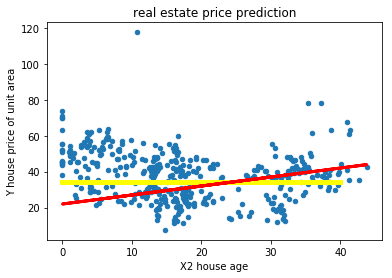

In [10]:
y_pred=line(x,0.5,22)

df.plot(kind='scatter',x='X2 house age',y='Y house price of unit area', title='real estate price prediction')

plt.plot([0,40],[34,34], color='yellow',linewidth=5)

plt.plot(x, y_pred, color='red',linewidth=3)

In [11]:
mean_squared_error(y_true,y_pred)

300.36977053140095

# Linear Regression with Keras

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam , SGD

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
df=pd.read_csv('Real estate.csv')

In [14]:
model= Sequential()
model.add(Dense(1,input_shape=(1,)))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(Adam(lr=0.8),'mean_squared_error')

In [17]:
model.fit(x,y_true,epochs=40,verbose=1) #verbose=0 not shows the epochs

Epoch 1/40
414/414 [==============================] - 1s 3ms/sample - loss: 906.1582
Epoch 2/40
414/414 [==============================] - 0s 63us/sample - loss: 564.5482
Epoch 3/40
414/414 [==============================] - 0s 94us/sample - loss: 399.1256
Epoch 4/40
414/414 [==============================] - 0s 82us/sample - loss: 315.9438
Epoch 5/40
414/414 [==============================] - 0s 72us/sample - loss: 258.3910
Epoch 6/40
414/414 [==============================] - 0s 65us/sample - loss: 217.8057
Epoch 7/40
414/414 [==============================] - 0s 60us/sample - loss: 200.5499
Epoch 8/40
414/414 [==============================] - 0s 82us/sample - loss: 201.3435
Epoch 9/40
414/414 [==============================] - 0s 56us/sample - loss: 207.8024
Epoch 10/40
414/414 [==============================] - 0s 77us/sample - loss: 183.5745
Epoch 11/40
414/414 [==============================] - 0s 63us/sample - loss: 184.3705
Epoch 12/40
414/414 [==============================] 

In [18]:
y_pred=model.predict(x)

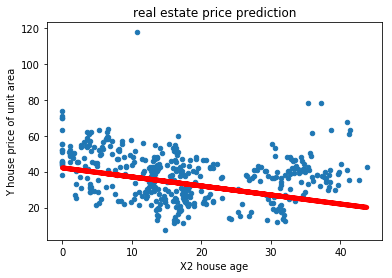

In [19]:
df.plot(kind='scatter',x='X2 house age',y='Y house price of unit area', title='real estate price prediction')
plt.plot(x,y_pred, color='red',linewidth=5)

In [20]:
w,b=model.get_weights()

In [21]:
w

array([[-0.5017177]], dtype=float32)

In [22]:
b

array([42.06531], dtype=float32)

## MNIST DATASET

In [4]:
from tensorflow.keras.datasets import mnist
import numpy as np
import pandas as pd
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [24]:
#RGB ki range [0,255] 0 pe white 255 pe black

In [25]:
#images pixels ki form mn image ki size 28*28=784 pixels

In [26]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [27]:
#during training model testing bhi kr raha hota islye during traimning accuracy nikal rahi hoti

In [28]:
train_images.shape

(60000, 28, 28)

In [29]:
#60000 depth mtlb no of images islye labels bhi 60000

In [30]:
test_images.shape

(10000, 28, 28)

In [31]:
#Network Artitecture
network=models.Sequential() #Sequential is a type of model
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,))) #28*28, is a vector
network.add(layers.Dense(10,activation='softmax')) #jo pichli layer ka output hoga wo agli layer ka input mtlb 512

In [32]:
#activation function ka kaam ye hota ke hmare jo result arey hotey wo linear results hote 
#unko agay proceed krnekeliye unko non linear mn convert krta hy

In [33]:
#relu hr negative value ko zero krke agy bhejta hy or hr +ve value ko same rehne deta hai

In [34]:
#10 way softmax layer will return an array of 10 probab scores(summing to 1). Each score will be the probab that the current
#digit image belongs to one of our 10 digit classes

In [35]:
#Compilation Step>>>>>>1)loss func 2)optimizer 3)metrices to monitor during training & testing
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy']) 
#categorical croossentrop for multiclass classification

In [36]:
#Preparing Image Data
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255

test_images=train_images.reshape((60000,28*28))
test_images=train_images.astype('float32')/255

In [37]:
#Preparing the labels
from tensorflow.keras.utils import to_categorical

train_labels=to_categorical(train_labels) #nominal values(like apple,banana) main comparison nahi hoskta
test_labels=to_categorical(train_labels)   #islye hm apne model ko ordinal data nh dengay islye hm one hot encoding kr rahay hain

In [38]:
#we fit the model to its training data 
network.fit(train_images,train_labels,epochs=5,batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 14s 241us/sample - loss: 0.2560 - acc: 0.9257
Epoch 2/5
60000/60000 [==============================] - 20s 332us/sample - loss: 0.1039 - acc: 0.9696
Epoch 3/5
60000/60000 [==============================] - 11s 178us/sample - loss: 0.0687 - acc: 0.9793
Epoch 4/5
60000/60000 [==============================] - 11s 189us/sample - loss: 0.0496 - acc: 0.9850
Epoch 5/5
60000/60000 [==============================] - 11s 185us/sample - loss: 0.0372 - acc: 0.9885


In [39]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

InvalidArgumentError: logits and labels must be broadcastable: logits_size=[32,10] labels_size=[64,10]
	 [[{{node loss_1/dense_2_loss/softmax_cross_entropy_with_logits}}]]

TypeError: Invalid dimensions for image data

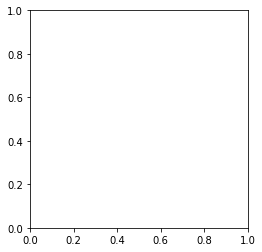

In [40]:
#Displaying 4th digit
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [41]:
#one hot encoding is a process by which categorical variables are converted into a form that could be provided to algorithms 
# to do a better job prediction

In [42]:
_0dtensor=np.array(15)

In [43]:
_0dtensor.ndim #scalar>>>> direct no

0

In [44]:
_1d=np.array([1,2,3,4])

In [45]:
_1d.ndim

1

In [46]:
_1d.shape

(4,)

In [47]:
_2d=np.array([[1,2,3,4]])

In [48]:
_2d.shape

(1, 4)

In [49]:
_3d=np.array([[[1,2,3,4]]])

In [50]:
_3d.shape

(1, 1, 4)

In [51]:
#one dimensional hy tensor hy tw vector kehlate
#jese hi  1 dimensioon se increase hogas tw wo metrix hoga

In [52]:
#jb hm dimension ki baat krte in terms of tensor then it indicates no of axes
#jb hm dimension ki bt krte in terms of _1d tensor tw no of elements 

In [53]:
(3,4,5) #tensor ke axis jitne hongay usko rank kehle dimensionality has confusion

(3, 4, 5)

In [54]:
#scalar has an empty shape ()

In [55]:
_1d=np.ones(shape=(4,2,3,3),dtype='int32')
_1d.ndim

4

In [56]:
_1d

array([[[[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]]],


       [[[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]]],


       [[[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]]],


       [[[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]]]])

In [57]:
_1d.dtype

dtype('int32')

In [58]:
my_slice = train_images[10:100]
print(my_slice.shape)


(90, 784)


In [59]:
my_slice = train_images[10:100, :]
my_slice.shape

(90, 784)

In [60]:
my_slice = train_images[10:100, 0:28]
my_slice.shape

(90, 28)

In [61]:
my_slice = train_images[:, 14:]
my_slice

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [62]:
my_slice = train_images[:, 7:-7]
my_slice

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [63]:
batch = train_images[:128]

In [64]:
batch = train_images[128:256]

In [65]:
batch = train_images[128 * n:128 * (n + 1)]

NameError: name 'n' is not defined

In [66]:
a=np.ones(shape=(2,3))

In [67]:
z=a*3

In [68]:
x=a*4

In [69]:
print(x)

print(z)

[[4. 4. 4.]
 [4. 4. 4.]]
[[3. 3. 3.]
 [3. 3. 3.]]


In [70]:
np.dot(x,z)

ValueError: shapes (2,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)

In [71]:
x=x.reshape(3,2)

In [72]:
np.dot(x,z)

array([[24., 24., 24.],
       [24., 24., 24.],
       [24., 24., 24.]])

In [73]:
x@z

array([[24., 24., 24.],
       [24., 24., 24.],
       [24., 24., 24.]])

In [74]:
# Artificial Neural Network word to word check krta hy agr aik bhi neg word milta hy tw usko negative classify krdeta

## IMDB DATASET

In [6]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [53]:
#validation main training main se kch data alg krdete hain or during training validation accuracy bhi calculate krta

In [7]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [8]:
max([max(sequence) for sequence in train_data])

9999

In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [10]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

In [15]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [16]:
# Validating your approach
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
#Training your model
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=10,
batch_size=512,
validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 225s 15ms/sample - loss: 0.5032 - acc: 0.7967 - val_loss: 0.3839 - val_acc: 0.8640
Epoch 2/10
15000/15000 [==============================] - 4s 236us/sample - loss: 0.2987 - acc: 0.9052 - val_loss: 0.3008 - val_acc: 0.8873
Epoch 3/10
15000/15000 [==============================] - 3s 220us/sample - loss: 0.2229 - acc: 0.9249 - val_loss: 0.2770 - val_acc: 0.8928
Epoch 4/10
15000/15000 [==============================] - 3s 223us/sample - loss: 0.1761 - acc: 0.9415 - val_loss: 0.2751 - val_acc: 0.8908
Epoch 5/10
15000/15000 [==============================] - 4s 234us/sample - loss: 0.1389 - acc: 0.9560 - val_loss: 0.2816 - val_acc: 0.8874
Epoch 6/10
15000/15000 [==============================] - 3s 233us/sample - loss: 0.1167 - acc: 0.9641 - val_loss: 0.2938 - val_acc: 0.8859
Epoch 7/10
15000/15000 [==============================] - 4s 234us/sample - loss: 0.0968 - acc: 0.9698 - val_

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

ValueError: x and y must have same first dimension, but have shapes (3,) and (10,)

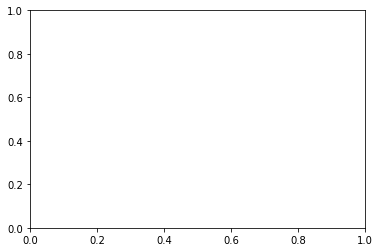

In [19]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len('acc') + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Retraining from scratch
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

In [20]:
results

NameError: name 'results' is not defined